# 台股

## 每日價

In [3]:
import requests
import pandas as pd 
from io import StringIO
import numpy as np

In [2]:
r = requests.post('http://app.twse.com.tw/ch/trading/exchange/MI_INDEX/MI_INDEX.php', data={
    'download': 'csv',
    'qdate':'107/01/03',
    'selectType':'ALL',
})

In [10]:
r.encoding = 'cp950'


In [59]:
df_stocks = pd.read_csv(StringIO("\n".join([
    i.translate({ord(c):None for c in ' '}) for i in r.text.split('\n')
    if len(i.split('",')) == 16 and i[0] != '='
])))


In [61]:
df_stocks.head()

,證券代號,證券名稱,成交股數,成交筆數,成交金額,開盤價,最高價,最低價,收盤價,漲跌(+/-),漲跌價差,最後揭示買價,最後揭示買量,最後揭示賣價,最後揭示賣量,本益比
0,1101,台泥,19915000,4868,735683200,36.5,37.35,36.25,37.35,+,0.80,37.3,11,37.35,445,20.41
1,1102,亞泥,7096000,2247,200596550,28.3,28.4,28.1,28.4,+,0.20,28.35,3,28.4,25,17.75
2,1103,嘉泥,603000,190,8036600,13.45,13.45,13.25,13.3,-,0.15,13.3,29,13.35,23,83.13
3,1104,環泥,330000,129,7593350,23,23.05,22.9,23,NaN,0.00,22.95,13,23,6,9.96
4,1108,幸福,288000,76,2412320,8.4,8.4,8.35,8.35,-,0.05,8.36,5,8.4,17,52.19


* 選股

In [79]:
df_stocks[(df_stocks['成交筆數']>1000)& (df_stocks['本益比'] < 15)]

,證券代號,證券名稱,成交股數,成交筆數,成交金額,開盤價,最高價,最低價,收盤價,漲跌(+/-),漲跌價差,最後揭示買價,最後揭示買量,最後揭示賣價,最後揭示賣量,本益比
19,1229,聯華,6928000,2753,259394200,36.35,37.9,36.35,37.9,+,1.55,37.85,12,37.9,128,12.94
27,1262,綠悅-KY,1554000,1011,101166200,65.3,65.8,64.5,65.1,-,0.10,64.9,1,65.1,2,8.22
28,1301,台塑,6430000,3909,630652400,98.1,98.5,97.7,98.5,+,0.40,98.2,24,98.5,64,12.91
29,1303,南亞,6662000,3154,518823600,77.2,78.2,77,78.2,+,1.20,78.1,28,78.2,231,9.81
31,1305,華夏,4195000,1998,137059650,33.05,33.1,32.4,32.75,-,0.20,32.7,45,32.75,2,10.88
34,1309,台達化,6970000,1956,107045150,15.3,15.6,15.1,15.6,+,0.40,15.55,66,15.6,22,14.18
35,1310,台苯,7273000,2740,163483650,22.75,22.8,22.35,22.5,-,0.15,22.5,54,22.55,77,9.22
36,1312,國喬,25925000,9340,790708250,31.2,31.2,30.2,30.35,-,0.45,30.35,36,30.4,24,8.93
38,1313,聯成,3593000,1446,67930350,19.05,19.05,18.8,18.8,-,0.10,18.8,1,18.85,52,9.40
39,1314,中石化,115957000,17418,1841879450,15.55,16.1,15.5,15.7,+,0.30,15.7,719,15.75,321,8.82


## 月營收

In [80]:
url = 'http://mops.twse.com.tw/nas/t21/sii/t21sc03_103_2_0.html'

df_rev = pd.read_html(url)

In [19]:
def monthly_report(year,month):
    """每月營收"""
    if year > 1900:
        year -= 1911
        
    ## 下載該年月營收網站，並轉為dataframe
    html_df = pd.read_html('http://mops.twse.com.tw/nas/t21/sii/t21sc03_'+str(year)+'_'+str(month)+'_0.html')    
    
    # 處理一下資料
    if html_df[0].shape[0] > 500:
        df = html_df[0].copy()
    else:
        df = pd.concat([df for df in html_df if df.shape[1] == 11])
    df = df[list(range(0,10))]
    column_index = df.index[(df[0] == '公司代號')][0]
    df.columns = df.iloc[column_index]
    df['當月營收'] = pd.to_numeric(df['當月營收'], 'coerce')
    df = df[~df['當月營收'].isnull()]
    df = df[df['公司代號'] != '合計']
    return df

In [20]:
df_monthly_10 = monthly_report(2017,10)

In [21]:
df_monthly_10.columns

Index(['公司代號', '公司名稱', '當月營收', '上月營收', '去年當月營收', '上月比較增減(%)', '去年同月增減(%)',
       '當月累計營收', '去年累計營收', '前期比較增減(%)'],
      dtype='object', name=4)

In [22]:
df_monthly_10.head()

4,公司代號,公司名稱,當月營收,上月營收,去年當月營收,上月比較增減(%),去年同月增減(%),當月累計營收,去年累計營收,前期比較增減(%)
5,1101,台泥,8387381.0,8071192,8261376,3.91,1.52,77339459,71286099,8.49
6,1102,亞泥,5840273.0,5806573,5513659,0.58,5.92,51189309,49616878,3.16
7,1103,嘉泥,167398.0,177734,299070,-5.81,-44.02,1732626,2403650,-27.91
8,1104,環球水泥,336159.0,403016,385127,-16.58,-12.71,3624014,3747842,-3.30
9,1108,幸福水泥,259826.0,267312,393978,-2.80,-34.05,2852787,3557672,-19.81


## 季報

In [123]:
## 綜合損益 http://mops.twse.com.tw/mops/web/ajax_t163sb04
url1 = 'http://mops.twse.com.tw/mops/web/ajax_t163sb04'
r = requests.post(url1,{'encodeURIComponent':'1',
                       'step':'1',
                       'firstin':'1',
                       'off':'1',
                       'TYPEK':'sii',
                       'year':'106',
                       'season':'03'})
r.encoding = 'utf8'

In [127]:
dfs = pd.read_html(r.text)
for i,df in enumerate(dfs):
    df.columns = df.iloc[0]
    dfs[i] = df.iloc[1:]

In [146]:
df = pd.concat(dfs).applymap(lambda x: x if x != '--' else np.nan)
df = df[df['公司代號'] != '公司代號']
df = df[~df['公司代號'].isnull()]

In [152]:
df.columns

Index(['上市公司第三季資料', '保險負債準備淨變動', '停業單位損益', '公司代號', '公司名稱', '其他收益及費損淨額',
       '其他綜合損益', '其他綜合損益（淨額）', '其他綜合損益（稅後淨額）', '其他綜合損益（稅後）', '利息以外淨損益',
       '利息以外淨收益', '利息淨收益', '原始認列生物資產及農產品之利益（損失）', '合併前非屬共同控制股權損益',
       '合併前非屬共同控制股權綜合損益淨額', '呆帳費用及保證責任準備提存', '呆帳費用及保證責任準備提存（各項提存）',
       '基本每股盈餘（元）', '已實現銷貨（損）益', '所得稅利益（費用）', '所得稅費用（利益）', '所得稅（費用）利益', '支出',
       '支出及費用', '收入', '收益', '未實現銷貨（損）益', '本期其他綜合損益（稅後淨額）', '本期淨利（淨損）',
       '本期稅後淨利（淨損）', '本期綜合損益總額', '本期綜合損益總額（稅後）', '淨利（損）歸屬於共同控制下前手權益',
       '淨利（損）歸屬於母公司業主', '淨利（損）歸屬於非控制權益', '淨利（淨損）歸屬於共同控制下前手權益',
       '淨利（淨損）歸屬於母公司業主', '淨利（淨損）歸屬於非控制權益', '淨收益', '營業利益', '營業利益（損失）', '營業外損益',
       '營業外收入及支出', '營業成本', '營業收入', '營業毛利（毛損）', '營業毛利（毛損）淨額', '營業費用',
       '生物資產當期公允價值減出售成本之變動利益（損失）', '稅前淨利（淨損）', '綜合損益總額歸屬於共同控制下前手權益',
       '綜合損益總額歸屬於母公司業主', '綜合損益總額歸屬於非控制權益', '繼續營業單位本期淨利（淨損）',
       '繼續營業單位本期稅後淨利（淨損）', '繼續營業單位本期純益（純損）', '繼續營業單位稅前損益', '繼續營業單位稅前淨利（淨損）',
       '繼續營業單位稅前純益（純損）'],
      dtype='object')

In [36]:
def financial_statement(year, season, type='綜合損益彙總表',typeK='sii'):
    """ 季財報
    year : (int)
        民國年/西元年
    season : (str or int)
        1,2,3,4
    type : (str)
        綜合損益彙總表 or 資產負債彙總表 or 營益分析彙總表
    typeK : (str)
        - sii : 上市
        - otc : 上櫃
        
    """
    if year >= 1000:
        year -= 1911
        
    if type == '綜合損益彙總表':
        url = 'http://mops.twse.com.tw/mops/web/ajax_t163sb04'
    elif type == '資產負債彙總表':
        url = 'http://mops.twse.com.tw/mops/web/ajax_t163sb05'
    elif type == '營益分析彙總表':
        url = 'http://mops.twse.com.tw/mops/web/ajax_t163sb06'
    else:
        print('type does not match')
    r = requests.post(url, {
        'encodeURIComponent':1,
        'step':1,
        'firstin':1,
        'off':1,
        'TYPEK': typeK, #otc:上櫃 , sii:上市
        'year':str(year),
        'season':str(season),
    })
    
    r.encoding = 'utf8'
    dfs = pd.read_html(r.text)
    
    
    for i, df in enumerate(dfs):
        df.columns = df.iloc[0]
        dfs[i] = df.iloc[1:]
        
    df = pd.concat(dfs).applymap(lambda x: x if x != '--' else np.nan)
    df = df[df['公司代號'] != '公司代號']
    df = df[~df['公司代號'].isnull()]
    return df

In [44]:
df_2017_season.columns

Index(['上櫃公司第一季資料', '不動產及設備－淨額', '保留盈餘', '保留盈餘（或累積虧損）', '備供出售金融資產－淨額', '公司代號',
       '公司名稱', '共同控制下前手權益', '其他借款', '其他權益', '其他負債', '其他資產－淨額', '其他金融負債',
       '其他金融資產－淨額', '再保險合約資產－淨額', '受限制資產－淨額', '合併前非屬共同控制股權', '央行及同業融資',
       '央行及金融同業存款', '存放央行及拆借金融同業', '存款及匯款', '庫藏股票', '待出售資產－淨額',
       '待註銷股本股數（單位：股）', '應付債券', '應付商業本票－淨額', '應付款項', '應收款項－淨額', '投資性不動產－淨額',
       '持有至到期日金融資產－淨額', '採用權益法之投資－淨額', '權益合計', '權益總額', '歸屬於母公司業主之權益',
       '歸屬於母公司業主之權益合計', '歸屬於母公司業主權益合計', '母公司暨子公司所持有之母公司庫藏股股數（單位：股）',
       '母公司暨子公司持有之母公司庫藏股股數（單位：股）', '每股參考淨值', '流動負債', '流動資產', '無形資產－淨額',
       '特別股負債', '現金及約當現金', '當期所得稅負債', '當期所得稅資產', '股本', '與待出售資產直接相關之負債', '負債合計',
       '負債準備', '負債總額', '貼現及放款－淨額', '資本公積', '資產合計', '資產總額', '透過損益按公允價值衡量之金融負債',
       '透過損益按公允價值衡量之金融資產', '遞延所得稅負債', '遞延所得稅資產', '避險之衍生金融負債', '避險之衍生金融資產',
       '附買回票券及債券負債', '附賣回票券及債券投資', '非控制權益', '非流動負債', '非流動資產',
       '預收股款（權益項下）之約當發行股數（單位：股）'],
      dtype='object')

In [45]:
df_2017_season = financial_statement(2017,1,type='營益分析彙總表',typeK='otc')

In [47]:
ids = ['8069','1815']
# columns = ['公司代號']
df_2017_season[df_2017_season['公司代號'].isin(ids)]

,公司代號,公司名稱,合計：共 736 家,毛利率(%)(營業毛利)/(營業收入),營業利益率(%)(營業利益)/(營業收入),營業收入(百萬元),稅前純益率(%)(稅前純益)/(營業收入),稅後純益率(%)(稅後純益)/(營業收入)
31,1815,富喬工業,NaN,27.51,16.03,1225.27,9.97,8.50
680,8069,元太科技,NaN,38.73,1.40,3217.87,5.17,4.80


In [25]:
df_2017_season.columns

Index(['上市公司第三季資料', '保險負債準備淨變動', '停業單位損益', '公司代號', '公司名稱', '其他收益及費損淨額',
       '其他綜合損益', '其他綜合損益（淨額）', '其他綜合損益（稅後淨額）', '其他綜合損益（稅後）', '利息以外淨損益',
       '利息以外淨收益', '利息淨收益', '原始認列生物資產及農產品之利益（損失）', '合併前非屬共同控制股權損益',
       '合併前非屬共同控制股權綜合損益淨額', '呆帳費用及保證責任準備提存', '呆帳費用及保證責任準備提存（各項提存）',
       '基本每股盈餘（元）', '已實現銷貨（損）益', '所得稅利益（費用）', '所得稅費用（利益）', '所得稅（費用）利益', '支出',
       '支出及費用', '收入', '收益', '未實現銷貨（損）益', '本期其他綜合損益（稅後淨額）', '本期淨利（淨損）',
       '本期稅後淨利（淨損）', '本期綜合損益總額', '本期綜合損益總額（稅後）', '淨利（損）歸屬於共同控制下前手權益',
       '淨利（損）歸屬於母公司業主', '淨利（損）歸屬於非控制權益', '淨利（淨損）歸屬於共同控制下前手權益',
       '淨利（淨損）歸屬於母公司業主', '淨利（淨損）歸屬於非控制權益', '淨收益', '營業利益', '營業利益（損失）', '營業外損益',
       '營業外收入及支出', '營業成本', '營業收入', '營業毛利（毛損）', '營業毛利（毛損）淨額', '營業費用',
       '生物資產當期公允價值減出售成本之變動利益（損失）', '稅前淨利（淨損）', '綜合損益總額歸屬於共同控制下前手權益',
       '綜合損益總額歸屬於母公司業主', '綜合損益總額歸屬於非控制權益', '繼續營業單位本期淨利（淨損）',
       '繼續營業單位本期稅後淨利（淨損）', '繼續營業單位本期純益（純損）', '繼續營業單位稅前損益', '繼續營業單位稅前淨利（淨損）',
       '繼續營業單位稅前純益（純損）'],
      dtype='object')

In [54]:
ids = ['1101','1102']
cols = ['公司代號','公司名稱','基本每股盈餘（元）','本期綜合損益總額']
# df_2017_season3[df_2017_season3['公司代號'].isin(ids) ][['公司名稱','基本每股盈餘（元）','本期綜合損益總額']]
df_2017_season3[df_2017_season.公司代號.isin(ids)][cols]

,公司代號,公司名稱,基本每股盈餘（元）,本期綜合損益總額
1,1101,台泥,0.23,151650
2,1102,亞泥,0.08,-2285301


# 選擇

In [165]:
df = financial_statement(106,3,'營益分析彙總表')


In [169]:
df.columns

Index(['公司代號', '公司名稱', '合計：共 869 家', '毛利率(%)(營業毛利)/(營業收入)',
       '營業利益率(%)(營業利益)/(營業收入)', '營業收入(百萬元)', '稅前純益率(%)(稅前純益)/(營業收入)',
       '稅後純益率(%)(稅後純益)/(營業收入)'],
      dtype='object')

In [170]:
df = df.drop(['合計：共 869 家'], axis=1)

In [173]:
df = df.set_index(['公司名稱'])
df

,公司代號,毛利率(%)(營業毛利)/(營業收入),營業利益率(%)(營業利益)/(營業收入),營業收入(百萬元),稅前純益率(%)(稅前純益)/(營業收入),稅後純益率(%)(稅後純益)/(營業收入)
公司名稱,,,,,,
台泥,1101,18.16,13.41,68952.11,13.38,10.04
亞泥,1102,13.14,9.26,45349.04,11.53,9.55
嘉泥,1103,15.08,-6.18,1565.23,0.79,-0.73
環球水泥,1104,12.89,4.11,3287.86,32.49,30.60
幸福水泥,1108,7.91,1.54,2592.87,1.16,0.80
信大水泥,1109,19.31,11.26,3743.41,12.34,10.15
東泥,1110,-3.58,-8.54,1141.61,0.44,0.47
味全公司,1201,30.21,0.77,13169.21,2.77,1.35
味王公司,1203,32.37,16.71,4633.52,17.09,12.47


In [177]:
df = df.astype(float)

In [183]:
df['毛利率(%)(營業毛利)/(營業收入)'].sort_values(ascending = False).head()

公司名稱
晶心科      99.70
龍邦國際     99.05
中福國際     92.62
一零四      90.73
大魯閣實業    90.25
Name: 毛利率(%)(營業毛利)/(營業收入), dtype: float64

In [184]:
df.loc['台積電']

公司代號                       2330.00
毛利率(%)(營業毛利)/(營業收入)          50.88
營業利益率(%)(營業利益)/(營業收入)        39.53
營業收入(百萬元)                699876.96
稅前純益率(%)(稅前純益)/(營業收入)        40.64
稅後純益率(%)(稅後純益)/(營業收入)        34.84
Name: 台積電, dtype: float64

In [185]:
df.loc[['台積電','聯發科']]

,公司代號,毛利率(%)(營業毛利)/(營業收入),營業利益率(%)(營業利益)/(營業收入),營業收入(百萬元),稅前純益率(%)(稅前純益)/(營業收入),稅後純益率(%)(稅後純益)/(營業收入)
公司名稱,,,,,,
台積電,2330.0,50.88,39.53,699876.96,40.64,34.84
聯發科,2454.0,35.04,4.80,177812.92,9.28,7.82


In [186]:
df.describe()

,公司代號,毛利率(%)(營業毛利)/(營業收入),營業利益率(%)(營業利益)/(營業收入),營業收入(百萬元),稅前純益率(%)(稅前純益)/(營業收入),稅後純益率(%)(稅後純益)/(營業收入)
count,869.000000,869.000000,869.000000,8.690000e+02,869.000000,869.000000
mean,3645.284235,21.634005,-15.497135,2.265592e+04,-6.541772,-8.422428
std,2316.974536,24.355047,528.784839,1.203178e+05,394.551733,394.232632
min,1101.000000,-433.490000,-15525.640000,0.000000e+00,-11528.210000,-11528.210000
25%,2030.000000,12.490000,1.190000,1.565230e+03,1.810000,1.280000
50%,2633.000000,19.900000,5.670000,3.687300e+03,6.270000,5.040000
75%,4938.000000,30.540000,11.990000,1.032272e+04,13.060000,10.530000
max,9958.000000,99.700000,84.540000,2.976348e+06,584.780000,584.660000


In [190]:
df.loc['川湖']

公司代號                     2059.00
毛利率(%)(營業毛利)/(營業收入)        53.75
營業利益率(%)(營業利益)/(營業收入)      40.70
營業收入(百萬元)                2997.45
稅前純益率(%)(稅前純益)/(營業收入)      28.46
稅後純益率(%)(稅後純益)/(營業收入)      19.60
Name: 川湖, dtype: float64

In [191]:
%matplotlib inline

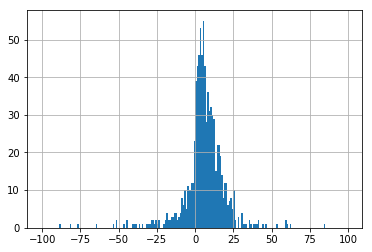

In [196]:
df[df.columns[2]].astype(float).hist(bins=range(-100,100))

In [197]:
cond1 = df['毛利率(%)(營業毛利)/(營業收入)'].astype(float) > 20
cond2 = df['營業利益率(%)(營業利益)/(營業收入)'].astype(float) > 5

In [198]:
df[cond1 & cond2]

,公司代號,毛利率(%)(營業毛利)/(營業收入),營業利益率(%)(營業利益)/(營業收入),營業收入(百萬元),稅前純益率(%)(稅前純益)/(營業收入),稅後純益率(%)(稅後純益)/(營業收入)
公司名稱,,,,,,
味王公司,1203.0,32.37,16.71,4633.52,17.09,12.47
統一,1216.0,33.69,6.38,305037.14,8.75,7.36
佳格,1227.0,28.31,10.42,19370.72,10.00,7.88
聯華實業,1229.0,21.69,10.13,3582.74,65.64,63.58
聯華食品,1231.0,20.49,5.74,5312.64,6.34,5.17
天仁,1233.0,57.20,9.80,1594.66,10.14,8.44
鮮活果汁-KY,1256.0,30.54,16.85,2405.25,16.73,10.79
綠悅-KY,1262.0,24.50,18.04,4867.23,18.48,15.59
三芳化工,1307.0,31.02,14.20,7653.07,13.16,10.35


## 每日股價

In [4]:
def crawlPrice(date):
    r = requests.post('http://app.twse.com.tw/ch/trading/exchange/MI_INDEX/MI_INDEX.php', data={
        'download': 'csv',
        'qdate':date,
        'selectType':'ALL',
    })
    r.encoding = 'big5'
    df = pd.read_csv(StringIO("\n".join([i.translate({ord(c): None for c in ' '}) 
                                         for i in r.text.split('\n') 
                                         if len(i.split('",')) == 16 and i[0] != '='])), header=0)
    df.set_index('證券代號', inplace=True)
    df.columns = ['證券名稱', '成交量', '成交筆數', '成交金額', '開盤價', '最高價', '最低價', '收盤價',
                  '漲跌(+/-)', '漲跌價差', '最後揭示買價', '最後揭示買量', '最後揭示賣價', '最後揭示賣量', '本益比']
    
    df['成交量'] /= 1000
    df = df.drop(['漲跌(+/-)','證券名稱','最後揭示買量','最後s揭示賣量'], axis=1)
    df = df.replace('--', np.nan)
    df = df.apply(pd.to_numeric)
    df = df.apply(pd.to_numeric)
    assert len(set(df.index)) == len(df.index)
    
    return df

In [5]:
import datetime
data = {}
n_days = 365*20
time = datetime.datetime.now()
while len(data) < n_days:
    
    # 假如日月 < 9 要補零
    month_str = str(time.month) if time.month > 9 else '0' + str(time.month)
    day_str = str(time.day) if time.day > 9 else '0' + str(time.day)
    
    # e.x 20100101
    taiwan_time_str = str(time.year - 1911) + '/' + month_str + '/' + day_str
    international_time_str = str(time.year) + month_str + day_str
    
    print('parsing', international_time_str)
    # 使用 crawPrice 爬資料
    try:
        data[international_time_str] = crawlPrice(taiwan_time_str)
        print('success!')
    except:
        # 假日爬不到
        print('fail! check the date is holiday')
    
    # 減一天
    time -= datetime.timedelta(days=1)

parsing 20180104
fail! check the date is holiday
parsing 20180103
success!
parsing 20180102
success!
parsing 20180101
fail! check the date is holiday
parsing 20171231
fail! check the date is holiday
parsing 20171230
fail! check the date is holiday
parsing 20171229
success!
parsing 20171228
success!
parsing 20171227
success!
parsing 20171226
success!
parsing 20171225
success!
parsing 20171224
fail! check the date is holiday
parsing 20171223
fail! check the date is holiday
parsing 20171222
success!
parsing 20171221
success!
parsing 20171220
success!
parsing 20171219
success!
parsing 20171218
success!
parsing 20171217
fail! check the date is holiday
parsing 20171216
fail! check the date is holiday
parsing 20171215
success!
parsing 20171214
success!
parsing 20171213
success!
parsing 20171212
success!
parsing 20171211
success!
parsing 20171210
fail! check the date is holiday
parsing 20171209
fail! check the date is holiday
parsing 20171208
success!
parsing 20171207
success!
parsing 20171206

寫入pickle

In [1]:
import pickle 

In [3]:
# with open('twstock_daily_price.pickle','wb') as f:
#     pickle.dump(data,f)

讀出pickle

In [2]:
import os

with open('twstock_daily_price.pickle','rb') as f:
    data = pickle.load(f)

整理成dataframe

In [4]:
from tqdm import tqdm
tw_stock_list = []
for date,df in tqdm(data.items()):
    df['yyyymmdd'] = pd.to_datetime(date)
    tw_stock_list.append(df)
    

# tw_stock_df['yyyymmdd'] = tw_stock_df['']

100%|████████████████████████████████████| 7300/7300 [00:05<00:00, 1439.68it/s]


In [5]:
tw_stock_df = pd.concat(tw_stock_list)

In [6]:
tw_stock_df.head()

,成交量,成交筆數,成交金額,開盤價,最高價,最低價,收盤價,漲跌價差,最後揭示買價,最後揭示賣價,本益比,yyyymmdd
證券代號,,,,,,,,,,,,
1101,19959.825,5001,737353608,36.50,37.35,36.25,37.35,0.80,37.30,37.35,20.41,2000-07-28
1102,7117.653,2307,201210179,28.30,28.40,28.10,28.40,0.20,28.35,28.40,17.75,2000-07-28
1103,608.907,217,8114960,13.45,13.45,13.25,13.30,0.15,13.30,13.35,83.13,2000-07-28
1104,332.954,147,7661292,23.00,23.05,22.90,23.00,0.00,22.95,23.00,9.96,2000-07-28
1108,288.000,76,2412320,8.40,8.40,8.35,8.35,0.05,8.36,8.40,52.19,2000-07-28


In [6]:
tw_stock_df = tw_stock_df[['yyyymmdd','成交量','成交筆數','開盤價','最高價','最低價','收盤價','本益比']]

In [7]:
tw_stock_df = tw_stock_df.reset_index()

In [19]:
temp_df = tw_stock_df[(tw_stock_df['yyyymmdd'] <='1995') ]

In [20]:
temp_df[~temp_df.duplicated(subset=['證券代號','成交量','成交筆數','開盤價','最高價','最低價','收盤價','本益比'])]

,證券代號,yyyymmdd,成交量,成交筆數,開盤價,最高價,最低價,收盤價,本益比
8486,1101,1994-07-14,19959.825,5001,36.50,37.35,36.25,37.35,20.41
8487,1102,1994-07-14,7117.653,2307,28.30,28.40,28.10,28.40,17.75
8488,1103,1994-07-14,608.907,217,13.45,13.45,13.25,13.30,83.13
8489,1104,1994-07-14,332.954,147,23.00,23.05,22.90,23.00,9.96
8490,1108,1994-07-14,288.000,76,8.40,8.40,8.35,8.35,52.19
8491,1109,1994-07-14,479.120,236,13.50,14.15,13.30,13.80,14.38
8492,1110,1994-07-14,101.060,45,14.65,14.70,14.50,14.55,0.00
8493,1201,1994-07-14,1514.846,488,21.05,21.30,20.85,20.85,0.00
8494,1203,1994-07-14,135.879,57,25.30,25.45,25.30,25.40,12.64
8495,1210,1994-07-14,1508.370,896,33.70,33.70,33.25,33.30,11.40


In [22]:
tw_stock_df2 = tw_stock_df[~tw_stock_df.duplicated(subset=['證券代號','成交量','成交筆數','開盤價','最高價','最低價','收盤價','本益比'])]
tw_stock_df2.describe()

,成交量,成交筆數,開盤價,最高價,最低價,收盤價,本益比
count,2.704496e+06,2.704496e+06,2.697195e+06,2.697195e+06,2.697195e+06,2.697195e+06,2.704496e+06
mean,3.605842e+03,9.889878e+02,3.547845e+01,3.595382e+01,3.497587e+01,3.541645e+01,2.301894e+01
std,1.005974e+04,1.995880e+03,8.261303e+01,8.371249e+01,8.143244e+01,8.245345e+01,8.848911e+01
min,0.000000e+00,0.000000e+00,6.000000e-02,7.000000e-02,6.000000e-02,7.000000e-02,0.000000e+00
25%,2.002290e+02,8.700000e+01,1.160000e+01,1.180000e+01,1.145000e+01,1.160000e+01,5.520000e+00
50%,7.611070e+02,3.020000e+02,2.025000e+01,2.050000e+01,2.000000e+01,2.020000e+01,1.208000e+01
75%,2.896769e+03,1.015000e+03,3.795000e+01,3.835000e+01,3.745000e+01,3.785000e+01,1.915000e+01
max,1.947674e+06,9.889000e+04,6.000000e+03,6.075000e+03,5.955000e+03,6.000000e+03,7.166670e+03


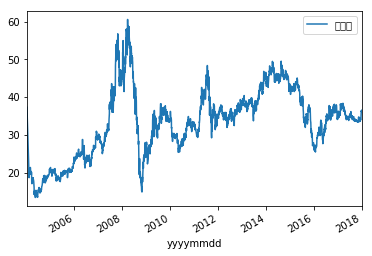

In [35]:
tw1101_price = tw_stock_df2[tw_stock_df2['證券代號'] == '1101']
tw1101_price_close = tw1101_price[['收盤價','yyyymmdd']]
tw1101_price_close = tw1101_price_close.set_index('yyyymmdd')
tw1101_price_close.plot()

In [19]:
def insertDataFrameToDb(df,con,tablename):
    """
    df: dataframe to be inserted 
    con: pypyodbc connection
    """
    print('更改pd.nan --> None')
    
    df = df.where(pd.notnull(df), None)
    print('塞入資料...')
    cursor = con.cursor()
    idx = 0
    for row_series in df.iterrows():
        idx += 1
        row_dict = {k:v for k,v in row_series[1].items()}
        col,val = list(zip(*row_dict.items()))
        sql_insert = """INSERT INTO {0}({1}) VALUES ({2})"""
        num_quest = '?' + ',?'*(len(row_dict)-1)
        fields = ','.join(col)
        sql_insert.format(tablename,fields,num_quest)
                
        try:
            cursor.execute(sql_insert.format(tablename,fields,num_quest),val)
        except pypyodbc.IntegrityError as e:
            print('data exist!!',row_dict)
            continue
        except pypyodbc.DataError as e:
            print('data db schema error',row_dict)
        if idx % 1000 == 0 :
            print('insert {} data'.format(idx))
            cursor.commit()
    cursor.commit()
    

In [13]:
import pypyodbc 
con = pypyodbc.connect("DRIVER={SQL Server};SERVER=dbm_public;UID=sa;PWD=01060728;DATABASE=External")


In [20]:
insertDataFrameToDb(tw_stock_df,con,'twstock_daily_price')

更改pd.nan --> None
塞入資料...


In [ ]:
insertDataFrameToDb

In [ ]:
for idx,e in enumerate(tw_stock_df.iterrows()):
    if idx>5:break
    else:
        print(idx,e)

In [221]:
close = pd.DataFrame({k:d['收盤價'] for k,d in data.items()}).transpose()
close.index = pd.to_datetime(close.index)

In [213]:
close.iloc[0:10]

2017-11-22    34.70
2017-11-23    34.50
2017-11-24    34.55
2017-11-27    34.40
2017-11-28    33.60
2017-11-29    33.90
2017-11-30    33.55
2017-12-01    33.70
2017-12-04    33.95
2017-12-05    33.95
Name: 1101, dtype: float64

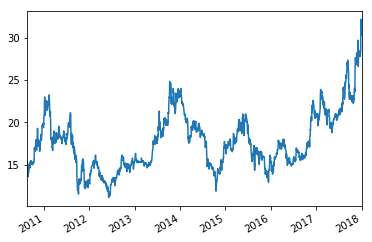

In [229]:
close['1312'].plot()

## 回測

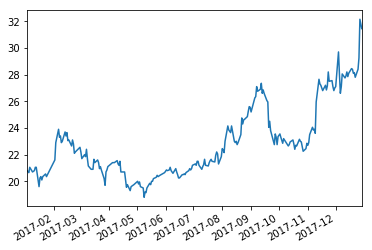

In [230]:
close['1312'].truncate('20170101','20171231').plot()

In [308]:
c = close.truncate('20100101','20151231')
dropdown = (c.cummax()-c).max()/c.max()*100 ## 一年最大下跌幅度
profit = (c.iloc[-1]/c.iloc[0] -1) * 100 ## 計算近n年報酬率
std = (c/c.shift()).std() * 200 ## 波動率

In [309]:
## 策略選擇
constraint = (std[std<2].index &
             profit[profit>10].index &
             dropdown[dropdown<50].index)

買了7支股票


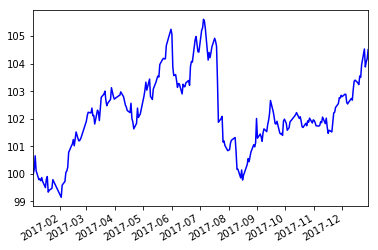

In [310]:
## backtest
start_capital = 100
c2 = close.truncate('20170101','20180101')
selected_stocks = constraint & c2.columns
print('買了{}支股票'.format(len(selected_stocks)))
# 回測
equality = c2[selected_stocks].dropna(axis=1).mean(axis=1)
total_equality = (equality / equality[0] * start_capital)
total_equality.plot(color='blue')
# 今年底的資產，變成明年初的資產
start_capital = total_equality[-1]